In [68]:
import urllib.parse
from urllib import request
import csv
import gensim
import spacy
from spacy import displacy
import pandas as pd
import gensim
import numpy as np
from collections import Counter
from sklearn import datasets
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from gensim import corpora, models
from janome.tokenizer import Tokenizer
import collections
from sklearn.metrics.pairwise import cosine_similarity
nlp = spacy.load('ja_ginza')


In [69]:
with open('daigaku3.csv', encoding='utf-8-sig') as f:
    reader = csv.reader(f)
    l = [row for row in reader]

In [70]:
docs = [x[1] for x in l]

In [71]:
from janome.tokenizer import Tokenizer

t = Tokenizer()

In [72]:
documents = [x[1] for x in l]

In [73]:
all_documents = ''
for d in documents:
    all_documents += d

In [74]:
counter = collections.Counter(token.base_form for token in t.tokenize(all_documents)
                          if token.part_of_speech.split(',')[0] == '名詞')

In [140]:
bag_of_word = []

In [141]:
remove_list = [')（',')、','ょしらべしょ',')）',')。','大学','学部','大学院','学院','学校','設置','立大','４月','創立','現在','時点','ほか']

In [142]:
keys = [k for k, v in counter.items()]

In [143]:
for k in keys:
    if not str.isdecimal(k) == True:
        if not len(k) == 1:
            if not k in remove_list:
                bag_of_word.append(k)

In [144]:
texts = [
    [w for w in bag_of_word if w in doc]
        for doc in documents
]

In [145]:
texts[0]

['国立',
 '法人',
 '明治',
 '起源',
 '安政',
 '江戸',
 '幕府',
 '設立',
 'ばん',
 '洋書',
 '開成',
 '変遷',
 '在住',
 '蘭方',
 'らん',
 '医師',
 'たち',
 '種痘',
 '西洋',
 '医学',
 '明治維新',
 '両校',
 '政府',
 '復興',
 '昌平',
 'ょうへいざか',
 '学問',
 '再興',
 'もと',
 '統合',
 '同年',
 '改称',
 '大学南',
 '洋学',
 '抗争',
 '廃止',
 '結果',
 '直轄',
 '教育',
 '機関',
 '発展',
 'その後',
 '一大',
 '学区',
 '一番',
 '中学',
 '東京',
 '他方',
 '東京大学',
 '合併',
 '本郷',
 '敷地',
 '一部',
 '加賀',
 '金沢',
 '前田',
 '上屋敷',
 '文政',
 '将軍',
 '徳川',
 '家斉',
 '溶姫',
 '造営',
 '赤門',
 '現存',
 '唯一',
 'もの',
 '重要',
 '文化財',
 '指定',
 '代名詞',
 '存在',
 '発足',
 '当時',
 '構成',
 '法学',
 '理学',
 '文学',
 '予備',
 '第一高等学校',
 '前身',
 '所管',
 '教員',
 'うち',
 '外国',
 '教師',
 '学生',
 '東大',
 '経費',
 '文部省',
 '近く',
 '神田',
 'しき',
 '医学部',
 '富士',
 '分散',
 'キャンパス',
 '集結',
 '帝国',
 '成立',
 '揺籃',
 'よう',
 '公布',
 '官省',
 '司法省',
 '専門',
 '包摂',
 '日本',
 '体系',
 '頂点',
 '国家',
 '性格',
 '法科',
 '医科',
 '工科',
 '文科',
 '理科',
 '五つ',
 '分科',
 '一つ',
 '組織',
 '修業',
 '年限',
 '京都',
 '創設',
 '期間',
 '統括',
 '総長',
 '採用',
 '実質',
 '最高',
 '意思',
 '決定',
 '評議',
 '講座',
 '教授',
 '名誉',
 '近代',
 '形成',
 '学長

In [146]:
dictionary = gensim.corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [147]:
count = Counter(w for doc in texts for w in doc)
count.most_common()[0:100]

[('昭和', 39),
 ('平成', 39),
 ('研究', 39),
 ('新制', 36),
 ('本部', 35),
 ('移行', 35),
 ('教育', 34),
 ('専門', 34),
 ('改称', 32),
 ('科学', 31),
 ('工学', 31),
 ('東京', 30),
 ('高等', 30),
 ('発足', 29),
 ('所在地', 28),
 ('統合', 27),
 ('京都', 27),
 ('研究所', 27),
 ('総合', 27),
 ('法人', 26),
 ('文学', 26),
 ('工学部', 26),
 ('明治', 25),
 ('設立', 25),
 ('創設', 25),
 ('法学', 24),
 ('文化', 24),
 ('情報', 24),
 ('経済', 24),
 ('併設', 24),
 ('理学', 23),
 ('施設', 23),
 ('国際', 23),
 ('国立', 22),
 ('起源', 22),
 ('経済学部', 22),
 ('改組', 22),
 ('社会', 22),
 ('センター', 22),
 ('前身', 21),
 ('日本', 21),
 ('施行', 21),
 ('付設', 21),
 ('理工', 21),
 ('法学部', 21),
 ('文学部', 20),
 ('学科', 20),
 ('医学', 19),
 ('私立', 19),
 ('附属', 19),
 ('その後', 18),
 ('大正', 18),
 ('増設', 18),
 ('理学部', 18),
 ('医学部', 17),
 ('総合大学', 17),
 ('大戦', 17),
 ('人間', 17),
 ('環境', 17),
 ('経営', 17),
 ('発展', 16),
 ('開設', 16),
 ('付属', 16),
 ('予科', 16),
 ('合併', 15),
 ('医科', 15),
 ('課程', 15),
 ('旧制', 15),
 ('入学', 15),
 ('工業', 15),
 ('中心', 15),
 ('化学', 14),
 ('戦後', 14),
 ('理工学部', 14),
 ('養成', 14),
 ('移転', 1

In [148]:
num_topics = 10
 
lda = gensim.models.ldamodel.LdaModel(
    corpus=corpus,
    num_topics=num_topics,
    id2word=dictionary
)

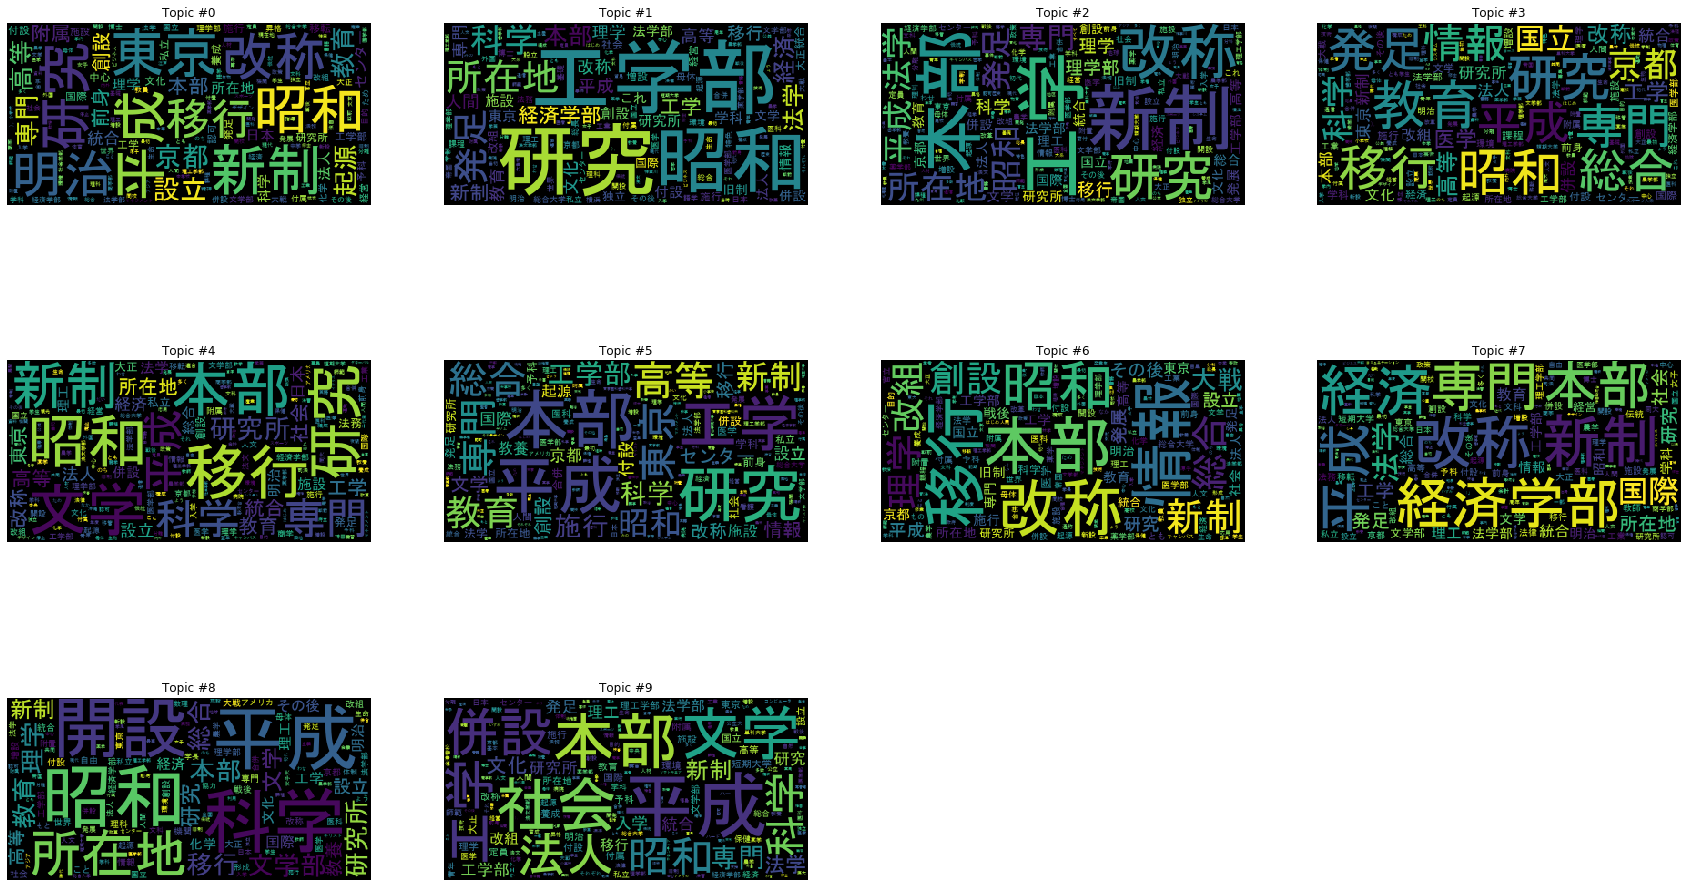

In [149]:
plt.figure(figsize=(30,30))
FONT_FILE = "C:\Windows\Fonts\MSGOTHIC.TTC"
for t in range(lda.num_topics):
    plt.subplot(5,4,t+1)
    x = dict(lda.show_topic(t,200))
    im = WordCloud(font_path=FONT_FILE,collocations=False, regexp=r"[\w']+").generate_from_frequencies(x)
    plt.imshow(im)
    plt.axis("off")
    plt.title("Topic #" + str(t))

In [150]:
x = lda.show_topic(6,20)
x

[('移行', 0.004243405),
 ('情報', 0.004118267),
 ('本部', 0.004016412),
 ('改称', 0.0039771087),
 ('昭和', 0.0038911358),
 ('新制', 0.0038254058),
 ('総合', 0.0037715593),
 ('理学', 0.0036390282),
 ('創設', 0.0036241694),
 ('改組', 0.003556971),
 ('大戦', 0.0033867795),
 ('その後', 0.0033847324),
 ('平成', 0.0033795007),
 ('研究', 0.0033684708),
 ('設立', 0.0033541548),
 ('発展', 0.0033489293),
 ('所在地', 0.0033043046),
 ('旧制', 0.0032605487),
 ('教育', 0.0032573035),
 ('京都', 0.0032454336)]

In [151]:
list_doc = [ [x[1] for x in lda.get_document_topics(corpus[i], minimum_probability=0)] for i in range(len(corpus))]

In [152]:
cos = cosine_similarity(list_doc)

In [196]:
uni = 2
b = np.sort(cos[uni])[-1::-1]
b_index = np.argsort(cos[uni])[-1::-1]
for i in range(len(b)):
    print(l[b_index[i]][0],b[i])

早稲田大学 0.99999976
龍谷大学 0.9962333
順天堂大学 0.9962302
東京外国語大学 0.99622566
東京工業大学 0.9962078
お茶の水女子大学 0.99619937
立教大学 0.99619484
東京芸術大学 0.996173
東京理科大学 0.9870127
一橋大学 0.3458365
武蔵美術大学 0.09019702
岐阜大学 0.08954591
横浜国立大学 0.089526154
新潟大学 0.08932305
東京学芸大学 0.089268
東海大学 0.089080825
神戸大学 0.08892614
北海道大学 0.08888376
名古屋大学 0.08887755
九州大学 0.08881449
京都大学 0.08869826
筑波大学 0.08868222
大阪大学 0.087980844
同志社大学 0.08793535
千葉大学 0.08771069
東京医科歯科大学 0.082935
東北大学 0.058447998
熊本大学 0.04463589
日本大学 0.030387595
会津大学 0.005090988
神奈川大学 0.0025553505
専修大学 0.0017223941
琉球大学 0.0015283447
青山学院大学 0.0014714176
中央大学 0.0014295992
法政大学 0.0011782635
明治大学 0.0011667417
東京女子大学 0.001150368
慶應義塾大学 0.0009759932
東京大学 0.0006652875


In [191]:
[x[1] for x in lda.get_document_topics(corpus[0], minimum_probability=0)]

[0.00025725216,
 0.00025722693,
 0.0002572271,
 0.000257276,
 0.00025725598,
 0.00025722675,
 0.99768484,
 0.00025723118,
 0.00025722917,
 0.00025722742]